<a href="https://colab.research.google.com/github/basukala/Rice-Leaf-Disease-Prediction/blob/main/RICELEAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Loading datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf" , shuffle=True 
)

Found 119 files belonging to 3 classes.


In [6]:
import pathlib
data_dir=pathlib.Path('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf')
data_dir

PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf')

In [7]:
list(data_dir.glob('*/*.jpg')) #Gives all the sub-folder along with all the images with that subfolder

[PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0516.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0514.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0512.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0515.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0513.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0511.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0510.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0509.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0507.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0505.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0339.jpg'),
 PosixPath('/content/drive/MyDri

In [8]:
#total number of images
len(list(data_dir.glob('*/*.jpg')))

52

### List of Bacterial Leaf Blight

In [9]:
bacterial_leaf_blight=list(data_dir.glob('Bacterial leaf blight/*.jpg'))
bacterial_leaf_blight

[PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0385.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0370.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0366.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0701.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0702.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Bacterial leaf blight/DSC_0700.jpg')]

### List of Brown Spot

In [10]:
brown_spot=list(data_dir.glob('Brown spot/*.jpg'))
brown_spot

[PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0115.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0114.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0113.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0112.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0106.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0111.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0110.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0108.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0109.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0107.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0105.jpg'),
 PosixPath('/content/

### List of Leaf Smut

In [11]:
leaf_smut=list(data_dir.glob('Leaf smut/*.jpg'))
leaf_smut[:10]

[PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0516.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0514.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0512.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0515.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0513.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0511.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0510.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0509.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0507.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0505.jpg')]



```
# This is formatted as code
```

### Images from different folders

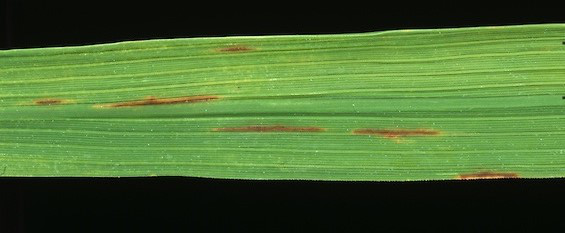

In [12]:
PIL.Image.open(str(leaf_smut[1]))

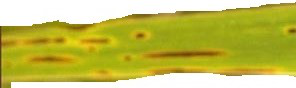

In [13]:
PIL.Image.open(str(brown_spot[1]))

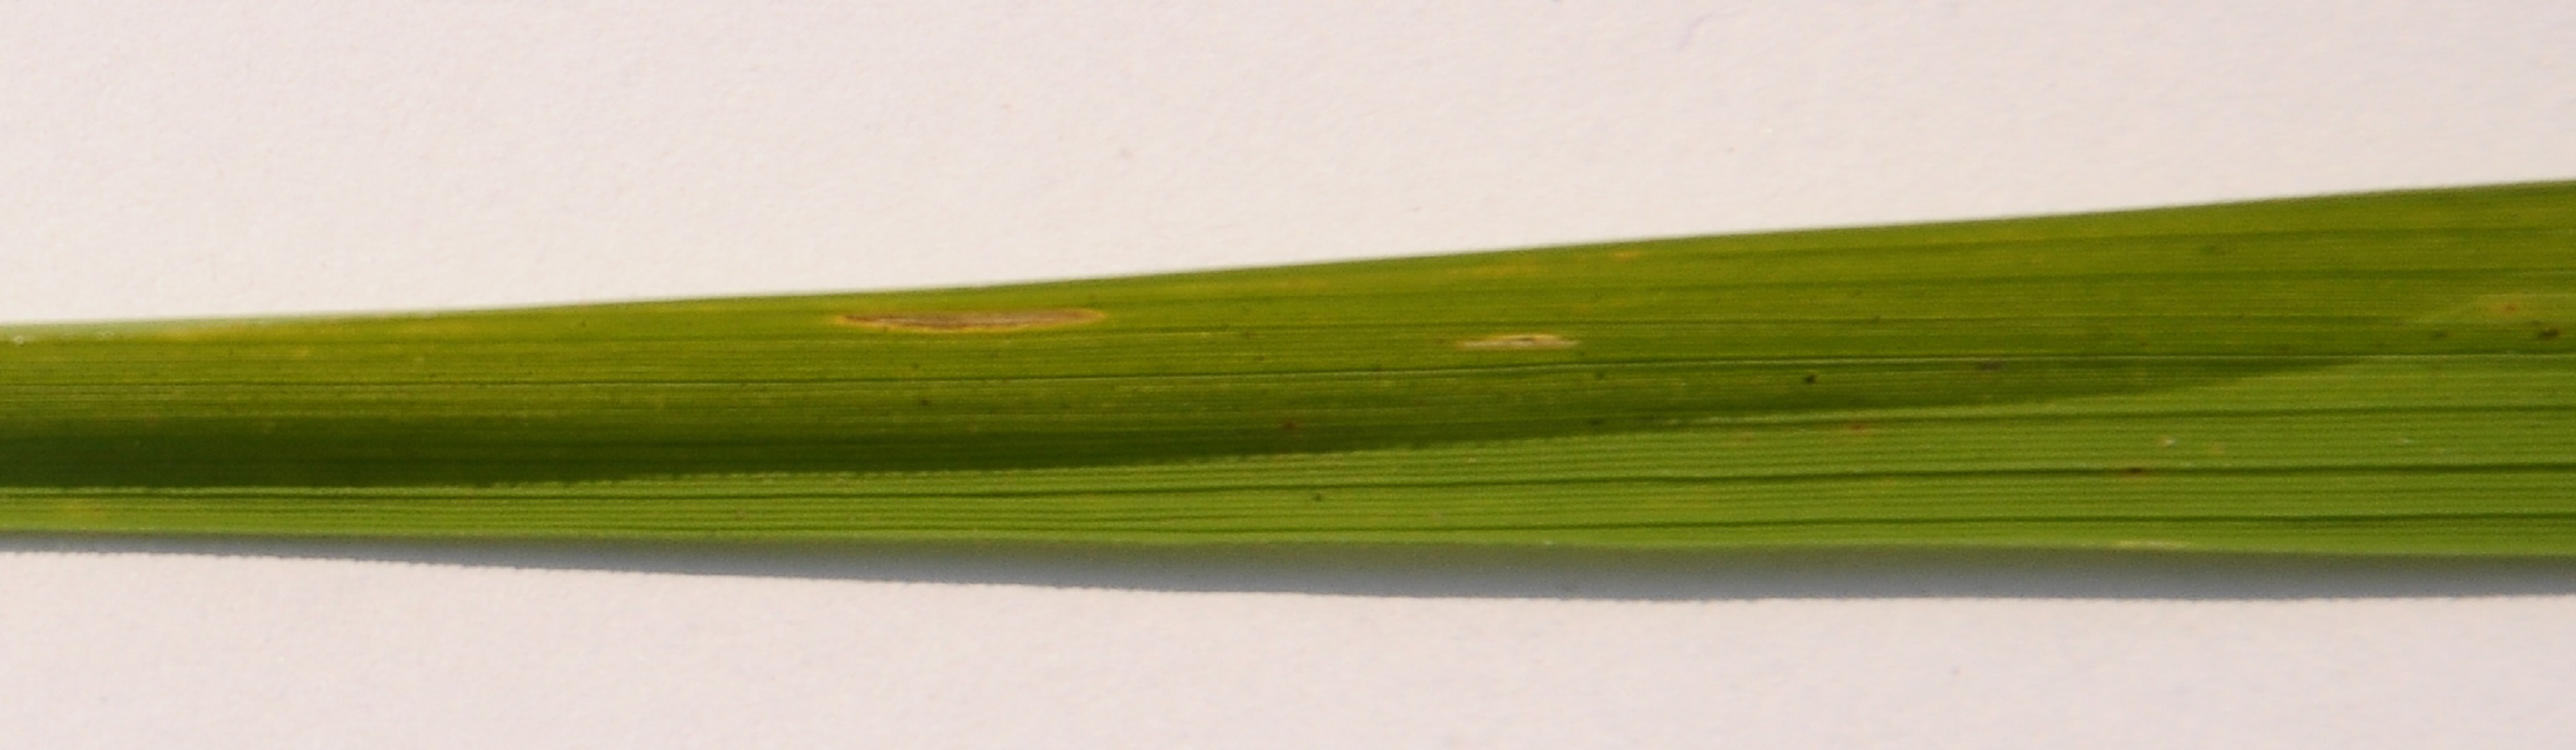

In [14]:
PIL.Image.open(str(bacterial_leaf_blight[1]))

### Create Class names

In [15]:
rice_leaf_dict={
 'bacterial_leaf_blight':list(data_dir.glob('Bacterial leaf blight/*.jpg')),
 'brown_spot':list(data_dir.glob('Brown spot/*.jpg')),
 'leaf_smut':list(data_dir.glob('Leaf smut/*.jpg'))   
}

In [16]:
rice_leaf_dict['brown_spot'][:5]

[PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0115.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0114.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0113.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0112.jpg'),
 PosixPath('/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Brown spot/DSC_0106.jpg')]

In [17]:
riceleaf_labels_dict={
 'bacterial_leaf_blight':0,
 'brown_spot':1,
 'leaf_smut':2   
}

In [18]:
riceleaf_labels_dict['leaf_smut']

2

In [19]:
str(rice_leaf_dict['leaf_smut'][0])

'/content/drive/MyDrive/dataset/PRCP-1001-RiceLeaf/Leaf smut/DSC_0516.jpg'

### opencv read data from the directory and then convert the data in 3D numpy array

In [20]:
img=cv2.imread(str(rice_leaf_dict['leaf_smut'][0]))
img

array([[[253, 255, 252],
        [251, 255, 250],
        [255, 255, 254],
        ...,
        [255, 254, 255],
        [251, 251, 251],
        [255, 255, 254]],

       [[251, 255, 254],
        [247, 252, 250],
        [251, 255, 254],
        ...,
        [253, 252, 255],
        [255, 255, 255],
        [255, 255, 254]],

       [[248, 255, 255],
        [245, 253, 252],
        [248, 255, 255],
        ...,
        [252, 251, 255],
        [251, 251, 251],
        [253, 254, 252]],

       ...,

       [[  0,  19,  14],
        [  0,  21,  13],
        [  2,  23,  15],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   8,   4],
        [  0,   9,   5],
        [  0,  13,   6],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 26,  43,  39],
        [ 26,  43,  39],
        [ 26,  47,  39],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [21]:
img.shape

(291, 741, 3)

In [22]:
cv2.resize(img,(180,180)).shape #resize image into 180 *180*3 shape

(180, 180, 3)

In [23]:
X, y=[], []

for disease_name,images in rice_leaf_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(180,180))
        X.append(resize_img)
        y.append(riceleaf_labels_dict[disease_name])


In [24]:
y ### image name

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [25]:
X[0]   ###images

array([[[232, 235, 243],
        [234, 236, 246],
        [233, 236, 244],
        ...,
        [154, 146, 146],
        [158, 150, 150],
        [158, 146, 146]],

       [[233, 236, 244],
        [234, 237, 245],
        [234, 237, 245],
        ...,
        [156, 146, 146],
        [160, 150, 150],
        [154, 146, 146]],

       [[233, 236, 244],
        [235, 239, 244],
        [234, 237, 245],
        ...,
        [154, 142, 142],
        [161, 149, 149],
        [156, 148, 148]],

       ...,

       [[235, 238, 246],
        [233, 235, 245],
        [234, 237, 245],
        ...,
        [235, 238, 246],
        [237, 239, 247],
        [234, 237, 245]],

       [[236, 239, 247],
        [234, 237, 245],
        [234, 237, 245],
        ...,
        [233, 239, 246],
        [237, 240, 245],
        [234, 237, 245]],

       [[235, 238, 246],
        [231, 237, 244],
        [234, 237, 245],
        ...,
        [236, 238, 246],
        [238, 238, 244],
        [238, 240, 248]]

In [26]:
X=np.array(X)
y=np.array(y)

# splitting into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=0.9)

In [28]:
len(X_test), len(y_test)

(6, 6)

In [29]:
len(X_train), len(y_train)

(46, 46)

In [30]:
## scaling 

In [31]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

### Modeling

In [32]:
num_classes=3
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [33]:
model_pred=model.fit(x=X_train_scaled,y=y_train,batch_size=None,validation_split=0.1,verbose="auto",epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 3s 572ms/step - loss: 1.3437 - accuracy: 0.3902 - val_loss: 4.7486 - val_accuracy: 0.6000
Epoch 2/20
2/2 [==============================] - 1s 381ms/step - loss: 2.4570 - accuracy: 0.3902 - val_loss: 2.7573 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 1s 375ms/step - loss: 1.0030 - accuracy: 0.5122 - val_loss: 1.5035 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 1s 368ms/step - loss: 0.8360 - accuracy: 0.5610 - val_loss: 1.1556 - val_accuracy: 0.6000
Epoch 5/20
2/2 [==============================] - 1s 387ms/step - loss: 0.8967 - accuracy: 0.5122 - val_loss: 1.1431 - val_accuracy: 0.4000
Epoch 6/20
2/2 [==============================] - 1s 372ms/step - loss: 0.8402 - accuracy: 0.7073 - val_loss: 1.3859 - val_accuracy: 0.2000
Epoch 7/20
2/2 [==============================] - 1s 365ms/step - loss: 0.7352 - accuracy: 0.7561 - val_loss: 1.8907 - val_accuracy: 0.0000e+00
Epoch 8/20
2/2 [===

In [34]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 75ms/step - loss: 2.1128 - accuracy: 0.5000


[2.1128170490264893, 0.5]

### clearly we can see that there is a problem of overfitting, train accuracy is too large compared to test accuracy to overcome this problem we have used data augumentation

In [35]:
model_pred

In [36]:
model_pred.params

{'epochs': 20, 'steps': 2, 'verbose': 1}

In [37]:
model_pred.history['accuracy']

[0.39024388790130615,
 0.39024388790130615,
 0.5121951103210449,
 0.5609756112098694,
 0.5121951103210449,
 0.707317054271698,
 0.7560975551605225,
 0.6097561120986938,
 0.7317073345184326,
 0.7317073345184326,
 0.7804877758026123,
 0.8292682766914368,
 0.7317073345184326,
 0.9024389982223511,
 0.7804877758026123,
 0.9512194991111755,
 0.8048780560493469,
 0.8536585569381714,
 0.8536585569381714,
 0.9512194991111755]

In [38]:
loss=model_pred.history['loss']
accuracy=model_pred.history['accuracy']
val_loss=model_pred.history['val_loss']
val_accuracy=model_pred.history['val_accuracy']

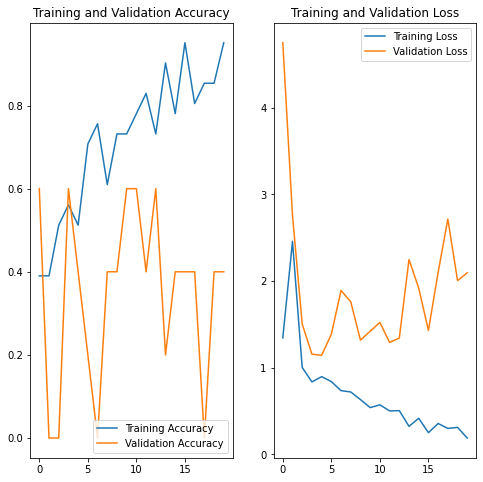

In [39]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# before applying augumentation, let's test our predicted values

In [40]:
prediction=model.predict(X_test_scaled)
prediction

array([[2.4936653e-03, 5.1731332e-03, 9.9233317e-01],
       [9.3391677e-03, 3.5450968e-01, 6.3615119e-01],
       [3.2119371e-04, 7.6386952e-01, 2.3580930e-01],
       [7.1433713e-03, 7.4616486e-01, 2.4669169e-01],
       [5.0740270e-03, 6.7025818e-02, 9.2790014e-01],
       [2.4786763e-04, 7.4361861e-03, 9.9231589e-01]], dtype=float32)

In [41]:
### function to convert labels into names
def rice_label(label):
    if label==0:
        return "Bacterial_leaf_blight"
    elif label==1:
        return "blast"
    else:
        return "brownspot"

In [42]:
def random_test(i):
    plt.axis('off')
    plt.imshow(X_test[i])
    actual= rice_label(np.argmax(prediction[i]))
    print("actual :", actual)
    predicted=rice_label(y_test[i])
    print("predicted label:",predicted)

# testing

actual : brownspot
predicted label: blast


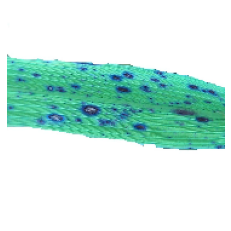

In [43]:
random_test(0)

actual : brownspot
predicted label: brownspot


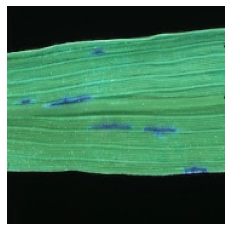

In [45]:
random_test(5)

actual : blast
predicted label: blast


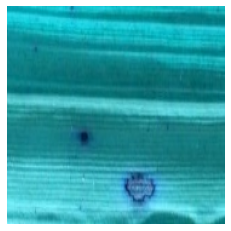

In [57]:
random_test(2)

actual : blast
predicted label: brownspot


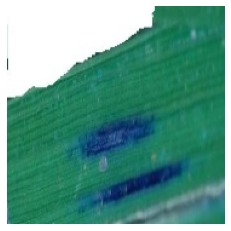

In [58]:
random_test(3)

## Data Augmentation
#### we can use Data augmentation to increase more samples from current sample. Make our model robust so that is doesnot overfit.


In [59]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
])
data_augmentation

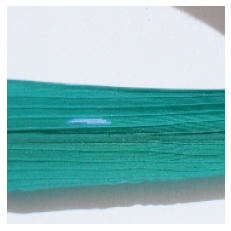

In [60]:
plt.axis('off')
plt.imshow(X[0])

### The result after applying data augmentation would be different in each cell

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


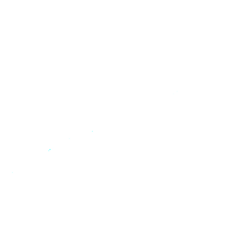

In [61]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


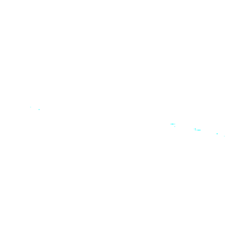

In [62]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

In [63]:
num_classes=3
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),#drop the 10 percent of neurons at random in each pass
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [64]:
aug_pred=model.fit(x=X_train_scaled,y=y_train,batch_size=None,validation_split=0.1,verbose=1,epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 3s 581ms/step - loss: 0.9875 - accuracy: 0.5366 - val_loss: 22.7023 - val_accuracy: 0.0000e+00
Epoch 2/25
2/2 [==============================] - 2s 420ms/step - loss: 6.9920 - accuracy: 0.5122 - val_loss: 6.0994 - val_accuracy: 0.6000
Epoch 3/25
2/2 [==============================] - 2s 428ms/step - loss: 1.9078 - accuracy: 0.4146 - val_loss: 2.2577 - val_accuracy: 0.6000
Epoch 4/25
2/2 [==============================] - 2s 421ms/step - loss: 1.4026 - accuracy: 0.4146 - val_loss: 1.2678 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 2s 414ms/step - loss: 0.9442 - accuracy: 0.4146 - val_loss: 1.3660 - val_accuracy: 0.0000e+00
Epoch 6/25
2/2 [==============================] - 2s 429ms/step - loss: 0.9357 - accuracy: 0.5122 - val_loss: 1.5082 - val_accuracy: 0.0000e+00
Epoch 7/25
2/2 [==============================] - 2s 412ms/step - loss: 0.8670 - accuracy: 0.5610 - val_loss: 1.7755 - val_accuracy: 0.6000
Epoch 8/25
2/2 [==

In [65]:
model.save("model.h5")

In [66]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 75ms/step - loss: 0.6479 - accuracy: 0.6667


[0.6478561758995056, 0.6666666865348816]

In [67]:
#after applying data augumentation overfitting problem is solved, also accuracy is improved 

In [68]:
prediction=model.predict(X_test_scaled)
prediction

array([[1.3594450e-01, 1.5196557e-01, 7.1208990e-01],
       [5.8624811e-02, 1.6273543e-01, 7.7863979e-01],
       [2.3915175e-06, 9.9959379e-01, 4.0382537e-04],
       [2.6656650e-02, 3.2945275e-01, 6.4389062e-01],
       [2.9062614e-01, 5.2119279e-01, 1.8818103e-01],
       [2.6041318e-02, 4.7586378e-02, 9.2637235e-01]], dtype=float32)

# Testing

actual : blast
predicted label: blast


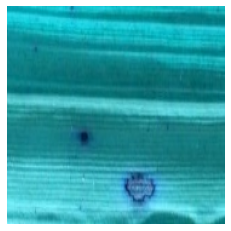

In [69]:
random_test(2)

actual : brownspot
predicted label: brownspot


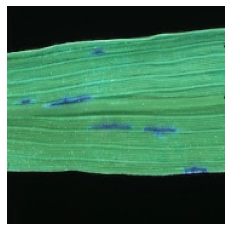

In [71]:
random_test(5)

actual : blast
predicted label: Bacterial_leaf_blight


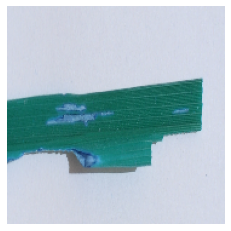

In [73]:
random_test(4) 

### Conclusion: we got the accuracy of 85% in train dataset and 68% in test dataset. We have used only the class label as 0=>Bacterial leaf blight, 1=>Brown spot, 2=>Leaf smut.